<a href="https://colab.research.google.com/github/MayerT1/Confusion_Matrix_Colab/blob/master/Final_ConfusionMatrix_Violin_Plots_TF_S1_Val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [95]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

In [ ]:
%cd /content/notebooks/
!ls

In [97]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import brier_score_loss
from google.colab import files


import pandas as pd
import numpy as np
#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [ ]:
mydataset = pd.read_csv('edge.csv')

actual_edge = mydataset['WaterPlane'].dropna()
first_edge = mydataset['first'].dropna()

#display(mydataset)

In [5]:
mydataset2 = pd.read_csv('jrc.csv')

actual_jrc = mydataset2['WaterPlane'].dropna()
first_jrc = mydataset2['first'].dropna()

# display(mydataset2)

In [7]:
# Creating the DataFrame 
df = pd.DataFrame({'actual':actual_edge, 
                    'first_edge':first_edge, 
                    'first_jrc':first_jrc}) 
  
# Print the dataframe 
##display(df)
print(df) 

##Class names for binary analysis
class_names = ['Water', 'Not Water']

,actual,first_edge,first_jrc
0,0,0.000323,0.113375
1,1,0.343620,0.875969
2,1,0.922181,0.821788
3,1,0.937127,0.867414
4,1,0.833600,0.870431
...,...,...,...
663,0,0.001255,0.108843
664,0,0.001662,0.190060
665,1,0.979680,0.867483
666,1,0.964615,0.743066


     actual  first_edge  first_jrc
0         0    0.000323   0.113375
1         1    0.343620   0.875969
2         1    0.922181   0.821788
3         1    0.937127   0.867414
4         1    0.833600   0.870431
..      ...         ...        ...
663       0    0.001255   0.108843
664       0    0.001662   0.190060
665       1    0.979680   0.867483
666       1    0.964615   0.743066
667       1    0.978403   0.854316

[668 rows x 3 columns]


Test space 6/29

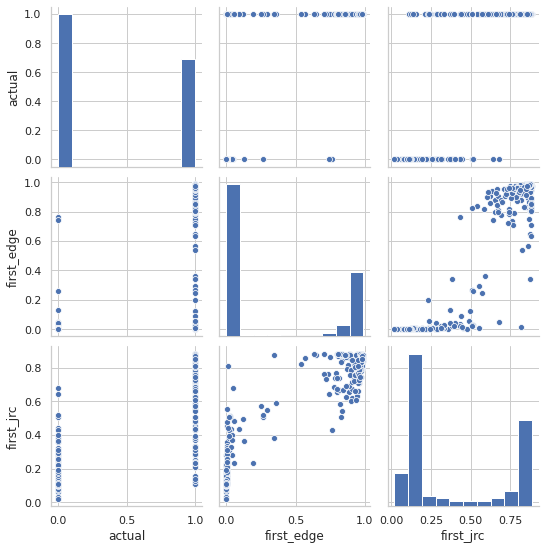

In [13]:
sns.pairplot(df)

[Text(0.5, 0, 'first_edge')]

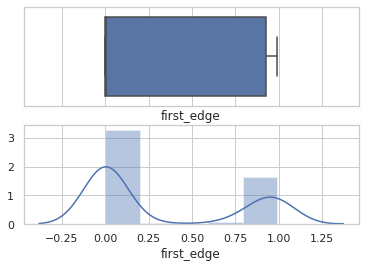

In [15]:
# # Import library and dataset
# import seaborn as sns
# import matplotlib.pyplot as plt
# df = sns.load_dataset('iris')
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,)
 
# Add a graph in each part
sns.boxplot(df["first_edge"], ax=ax_box)
sns.distplot(df["first_edge"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='first_edge')


[Text(0.5, 0, 'first_jrc')]

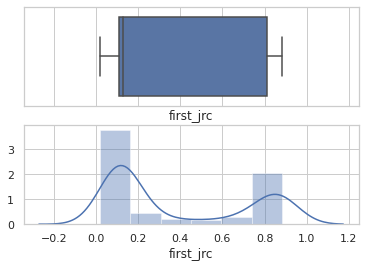

In [16]:
# # Import library and dataset
# import seaborn as sns
# import matplotlib.pyplot as plt
# df = sns.load_dataset('iris')
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,)
 
# Add a graph in each part
sns.boxplot(df["first_jrc"], ax=ax_box)
sns.distplot(df["first_jrc"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='first_jrc')


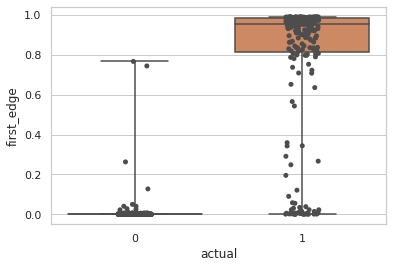

In [11]:
ax = sns.boxplot(x="actual", y="first_edge", data=df, whis=np.inf)
ax = sns.stripplot(x="actual", y="first_edge", data=df, color=".3")

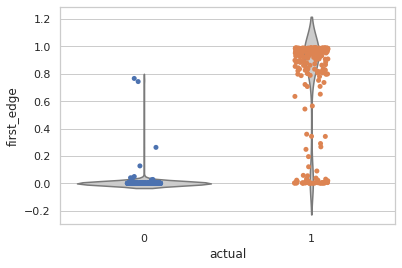

In [10]:
# https://seaborn.pydata.org/generated/seaborn.stripplot.html
import seaborn as sns
sns.set(style="whitegrid")
# ax = sns.stripplot(x="actual", y="first_edge", data=df)
# # ax = sns.stripplot(x="day", y="total_bill", data=tips)
# print(tips)

ax = sns.violinplot(x="actual", y="first_edge", data=df,
                    inner=None, color=".8")
ax = sns.stripplot(x="actual", y="first_edge", data=df)


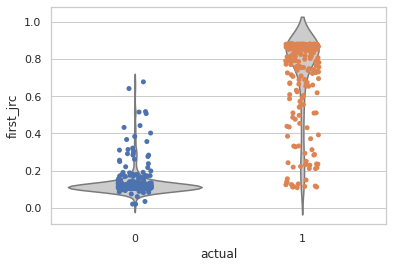

In [48]:
bx = sns.violinplot(x="actual", y="first_jrc", data=df,
                    inner=None, color=".8")
bx = sns.stripplot(x="actual", y="first_jrc", data=df)

Text(0.5, 1.0, 'whitegrid')

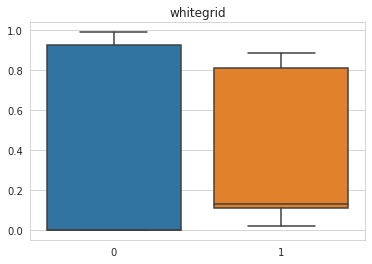

In [16]:
# library
import seaborn as sns
import numpy as np
 
# Data
data = first_edge, first_jrc
 
# Proposed themes: darkgrid, whitegrid, dark, white, and ticks
sns.set_style("whitegrid")
sns.boxplot(data=data)
plt.title("whitegrid")


# loaded new csv here beware

Text(0, 0.5, 'WaterPlane')

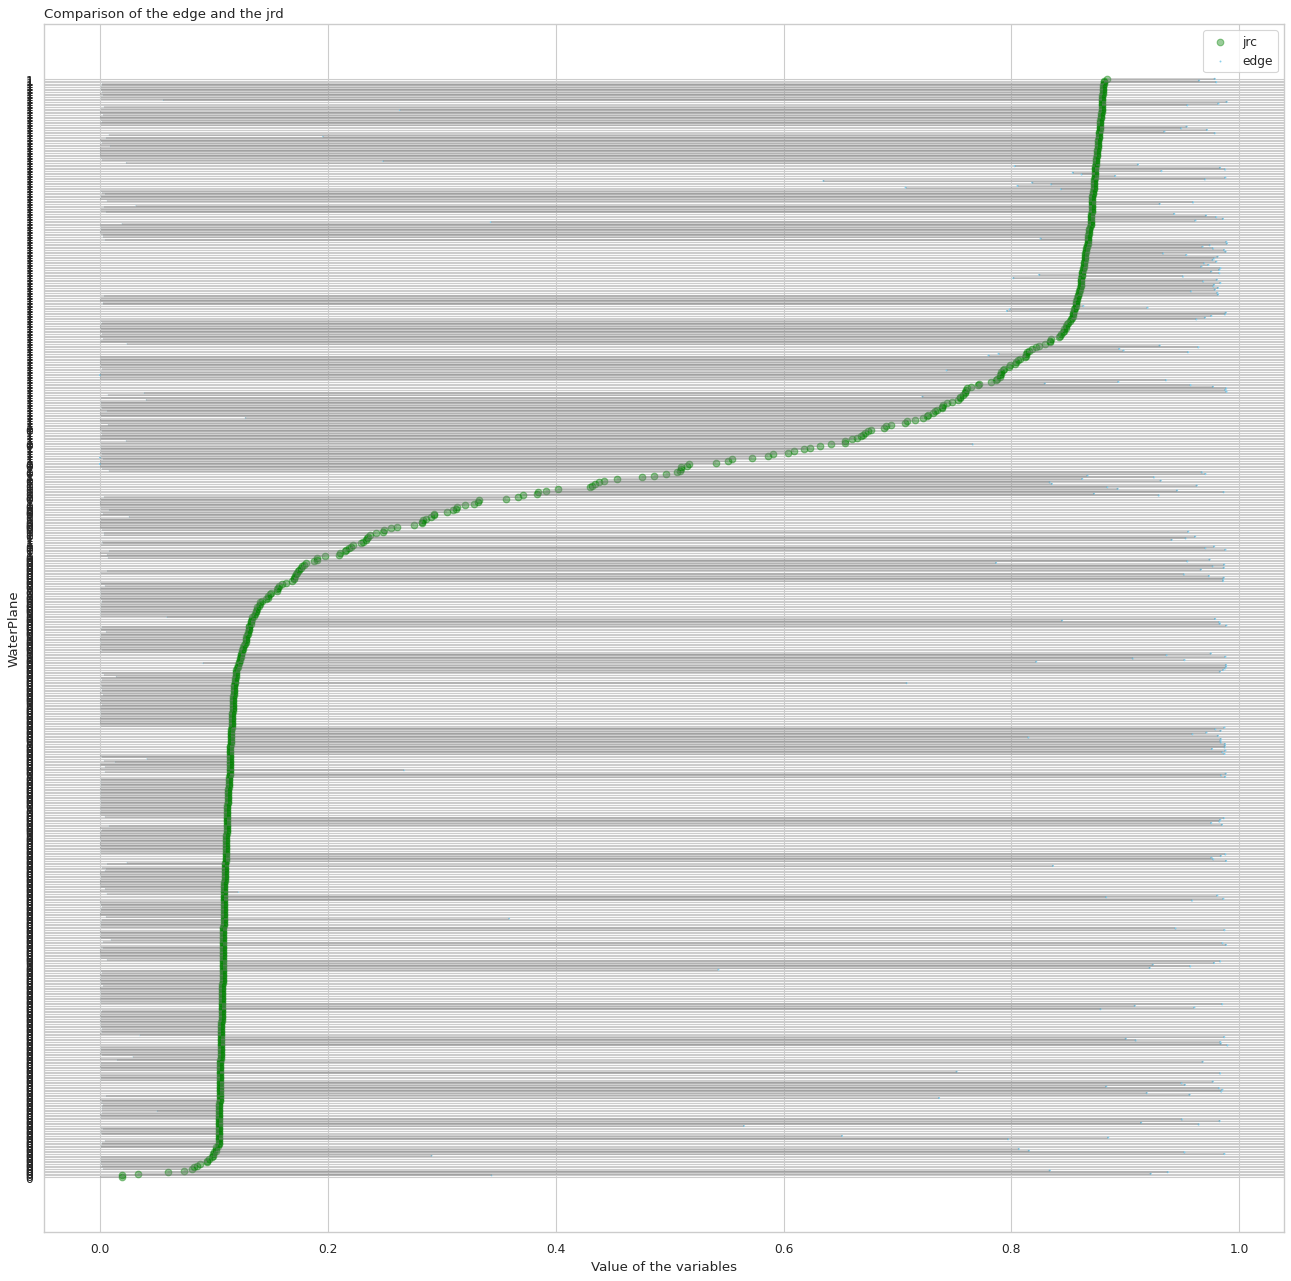

In [99]:
#https://simpleanalytical.com/dumbbell-plot-compare-two-values-python

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')


# Create a dataframe
mydataset3 = pd.read_csv('TF_S1_Val_CSV_JRC_EDGE.csv')
# display(mydataset3)

actual = mydataset3['WaterPlane'].dropna()
edge = mydataset3['edge'].dropna()
jrc = mydataset3['jrc'].dropna()
count = mydataset3['count'].dropna()

# value1=np.random.uniform(size=20)
#value2=value1+np.random.uniform(size=20)/4
# df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })

# Reorder it following the values of the first value:
ordered_df = count
# print('ordered_df', ordered_df)
my_range=range(1,len(df.index)+1)

 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=edge, xmax=jrc, color='grey', alpha=0.4)
plt.scatter(jrc, my_range, color='green', alpha=0.4 , label='jrc')
plt.scatter(edge, my_range,edge, color='skyblue', alpha=1, label='edge')

plt.legend()
 
# Add title and axis names
plt.yticks(my_range, actual)
plt.title("Comparison of the edge and the jrd", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('WaterPlane')




R2

In [123]:
edge_rs2 = r2_score(actual, edge)
print("edge_rs2", edge_rs2)

jrc_rs2 = r2_score(actual, jrc)
print("jrc_rs2", jrc_rs2)


edge_rs2 -0.6475312930478387
jrc_rs2 0.744077670146623


RMSE

In [100]:
from sklearn.metrics import mean_squared_error
y_true = np.array(actual)
y_pred = np.array(edge)
edge_mean_squared_error = mean_squared_error(y_true, y_pred)
print("edge_mean_squared_error", edge_mean_squared_error)

y_true = np.array(actual)
y_pred = np.array(jrc)
jrc_mean_squared_error = mean_squared_error(y_true, y_pred)
print("jrc_mean_squared_error", jrc_mean_squared_error)


edge_mean_squared_error 0.3998869889475516
jrc_mean_squared_error 0.0621171872858244


Logloss

In [124]:
#https://machinelearningmastery.com/cross-entropy-for-machine-learning/
# calculate log loss for classification problem with scikit-learn
from sklearn.metrics import log_loss
from numpy import asarray
# define classification data
p = np.array(actual)
q = np.array(edge)
# define data as expected, e.g. probability for each event {0, 1}
y_true = asarray([[1-v, v] for v in p])
y_pred = asarray([[1-v, v] for v in q])
# calculate the average log loss
LogLoss = log_loss(y_true, y_pred)
#https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d#:~:text=The%20bolder%20the%20probabilities%2C%20the,distinguish%20more%20strongly%20the%20classes.
print('Edge Average Log Loss: %.3f' % LogLoss)


#https://machinelearningmastery.com/cross-entropy-for-machine-learning/
# calculate log loss for classification problem with scikit-learn
from sklearn.metrics import log_loss
from numpy import asarray
# define classification data
p = np.array(actual)
q = np.array(jrc)
# define data as expected, e.g. probability for each event {0, 1}
y_true = asarray([[1-v, v] for v in p])
y_pred = asarray([[1-v, v] for v in q])
# calculate the average log loss
LogLoss = log_loss(y_true, y_pred)
#https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d#:~:text=The%20bolder%20the%20probabilities%2C%20the,distinguish%20more%20strongly%20the%20classes.
print('jrc Average Log Loss: %.3f' % LogLoss)



Edge Average Log Loss: 2.511
jrc Average Log Loss: 0.248


ROC

auc 0.5463497280877506
Sensitivity: 0.40794223826714804
Specificity: 0.690537084398977
Sensitivity: 0.36462093862815886
Specificity: 0.7237851662404092


(None, None)

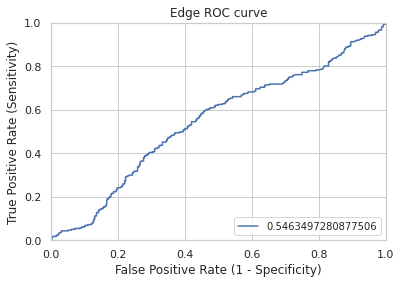

In [115]:
#https://www.kaggle.com/vipulgandhi/how-to-choose-right-metric-for-evaluating-ml-model
#  IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects false positive rate(fpr), true positive rate(tpr), thresholds


fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(actual, edge)
# fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_train, y_pred_prob_rfc_class1)
# fpr_SGD, tpr_SGD, thresholds_SGD = metrics.roc_curve(y_train, y_pred_prob_SGD)
auc = metrics.auc(fpr_logreg, tpr_logreg)
print("auc", auc)

plt.plot(fpr_logreg, tpr_logreg, label=auc )# "logreg" 
# plt.plot(fpr_rfc, tpr_rfc, label="rfc")
# plt.plot(fpr_SGD, tpr_SGD, label="SGD")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Edge ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

def evaluate_threshold(tpr, fpr,clf_threshold, threshold):
    print('Sensitivity:', tpr[clf_threshold > threshold][-1])
    print('Specificity:', 1 - fpr[clf_threshold > threshold][-1])
evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.2), evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.8)


auc 0.9821433517685837
Sensitivity: 0.9530685920577617
Specificity: 0.9335038363171355
Sensitivity: 0.0036101083032490976
Specificity: 1.0


(None, None)

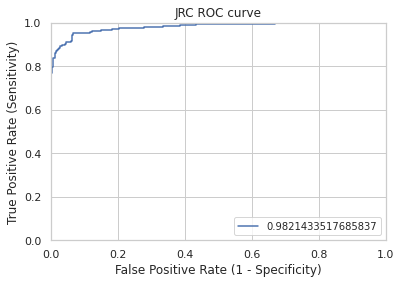

In [114]:
fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(actual, jrc)
# fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_train, y_pred_prob_rfc_class1)
# fpr_SGD, tpr_SGD, thresholds_SGD = metrics.roc_curve(y_train, y_pred_prob_SGD)
auc = metrics.auc(fpr_logreg, tpr_logreg)
print("auc", auc)

plt.plot(fpr_logreg, tpr_logreg, label=auc )# "logreg" 
# plt.plot(fpr_rfc, tpr_rfc, label="rfc")
# plt.plot(fpr_SGD, tpr_SGD, label="SGD")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('JRC ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

def evaluate_threshold(tpr, fpr,clf_threshold, threshold):
    print('Sensitivity:', tpr[clf_threshold > threshold][-1])
    print('Specificity:', 1 - fpr[clf_threshold > threshold][-1])
evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.2), evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.8)

# Data Flipping

In [10]:
# ##Flips the data through transpose and flip to rearrange the confusion matrix values:(tp, tn, fp, fn) so that it can be emplyed by the the ploting code block below
# results_edge = confusion_matrix(actual_edge, first_edge)
# #print("results_edge", results_edge)

# transposed_results_edge = results_edge.transpose()
# #print("transposed_results_edge", transposed_results_edge)

# final_results_edge = np.flip(transposed_results_edge)
# print("final_results_edge", final_results_edge)

# print("---")

results_jrc = confusion_matrix(actual_jrc, first_jrc)
#print("results_jrc", results_jrc)

transposed_results_jrc = results_jrc.transpose()
#print("transposed_results_jrc", transposed_results_jrc)

final_results_jrc = np.flip(transposed_results_jrc)
print("final_results_jrc", final_results_jrc)

print("---")



ValueError: ignored

In [ ]:
##Flips the data through transpose and flip to rearrange the confusion matrix values:(tp, tn, fp, fn) so that it can be emplyed by the the ploting code block below
results_9_9 = confusion_matrix(actual_9_9, first_9_9)
#print("results_9_9", results_9_9)

transposed_results_9_9 = results_9_9.transpose()
#print("transposed_results_9_9", transposed_results_9_9)

final_results_9_9 = np.flip(transposed_results_9_9)
print("final_results_9_9", final_results_9_9)

print("---")

results_9_11 = confusion_matrix(actual_9_11, first_9_11)
#print("results_9_11", results_9_11)

transposed_results_9_11 = results_9_11.transpose()
#print("transposed_results_9_11", transposed_results_9_11)

final_results_9_11 = np.flip(transposed_results_9_11)
print("final_results_9_11", final_results_9_11)

print("---")

results_9_23 = confusion_matrix(actual_9_23, first_9_23)
#print("results_9_23", results_9_23)

transposed_results_9_23 = results_9_23.transpose()
#print("transposed_results_9_23", transposed_results_9_23)

final_results_9_23 = np.flip(transposed_results_9_23)
print("final_results_9_23", final_results_9_23)

print("---")

results_10_3 = confusion_matrix(actual_10_3, first_10_3)
#print("results_10_3", results_10_3)

transposed_results_10_3 = results_10_3.transpose()
#print("transposed_results_10_3", transposed_results_10_3)

final_results_10_3 = np.flip(transposed_results_10_3)
print("final_results_10_3", final_results_10_3)

print("---")

results_10_5 = confusion_matrix(actual_10_5, first_10_5)
#print("results_10_5", results_10_5)

transposed_results_10_5 = results_10_5.transpose()
#print("transposed_results_10_5", transposed_results_10_5)

final_results_10_5 = np.flip(transposed_results_10_5)
print("final_results_10_5", final_results_10_5)

print("---")

results_10_15 = confusion_matrix(actual_10_15, first_10_15)
#print("results_10_15", results_10_15)

transposed_results_10_15 = results_10_15.transpose()
#print("transposed_results_10_15", transposed_results_10_15)

final_results_10_15 = np.flip(transposed_results_10_15)
print("final_results_10_15", final_results_10_15)



final_results_9_9 [[12  0]
 [ 0 14]]
---
final_results_9_11 [[36  0]
 [ 8 75]]
---
final_results_9_23 [[22  0]
 [ 9 72]]
---
final_results_10_3 [[41  2]
 [ 6 90]]
---
final_results_10_5 [[52  0]
 [11 80]]
---
final_results_10_15 [[69  1]
 [11 57]]


# Export Stats

In [ ]:
#displays a table of indexed by stat method/algorithm
stat_dict = {"Stat_method":  ["Accuracy Score", "precision_score", "average_precision_score", "cohen_kappa_score", "brier_score_loss", "roc_auc_score", 'f1_score' ],
                        'Edge_9_9':   [accuracy_score(actual_9_9, first_9_9), precision_score(actual_9_9, first_9_9),average_precision_score(actual_9_9, first_9_9), cohen_kappa_score(actual_9_9, first_9_9), brier_score_loss(actual_9_9, first_9_9), roc_auc_score(actual_9_9, first_9_9), f1_score(actual_9_9, first_9_9)],
                        'Edge_9_11':  [accuracy_score(actual_9_11, first_9_11),precision_score(actual_9_11, first_9_11), average_precision_score(actual_9_11, first_9_11), cohen_kappa_score(actual_9_11, first_9_11), brier_score_loss(actual_9_11, first_9_11), roc_auc_score(actual_9_11, first_9_11),f1_score(actual_9_11, first_9_11)],
                        'Edge_9_23':   [accuracy_score(actual_9_23, first_9_23), precision_score(actual_9_23, first_9_23), average_precision_score(actual_9_23, first_9_23),cohen_kappa_score(actual_9_23, first_9_23), brier_score_loss(actual_9_23, first_9_23), roc_auc_score(actual_9_23, first_9_23), f1_score(actual_9_23, first_9_23)],
                        "Edge_10_3":  [accuracy_score(actual_10_3, first_10_3), precision_score(actual_10_3, first_10_3), average_precision_score(actual_10_3, first_10_3), cohen_kappa_score(actual_10_3, first_10_3), brier_score_loss(actual_10_3, first_10_3), roc_auc_score(actual_10_3, first_10_3), f1_score(actual_10_3, first_10_3)],
                        "Edge_10_5":  [accuracy_score(actual_10_5, first_10_5), precision_score(actual_10_5, first_10_5), average_precision_score(actual_10_5, first_10_5), cohen_kappa_score(actual_10_5, first_10_5), brier_score_loss(actual_10_5, first_10_5), roc_auc_score(actual_10_5, first_10_5), f1_score(actual_10_5, first_10_5)],
                        "Edge_10_15":  [accuracy_score(actual_10_15, first_10_15), precision_score(actual_10_15, first_10_15), average_precision_score(actual_10_15, first_10_15), cohen_kappa_score(actual_10_15, first_10_15), brier_score_loss(actual_10_15, first_10_15), roc_auc_score(actual_10_15, first_10_15), f1_score(actual_10_15, first_10_15)],
                        }
stat_dict_output_df = pd.DataFrame(stat_dict)
display(stat_dict_output_df)


print("-")
print( 'classification_report Edge_9_9 :')
print( classification_report(actual_9_9, first_9_9) )
print("-")
print( 'classification_report Edge_9_11 :')
print( classification_report(actual_9_11, first_9_11) )
print("-")
print( 'classification_report Edge_9_23 :')
print( classification_report(actual_9_23, first_9_23) )
print("-")
print( 'classification_report Edge_10_3 :')
print( classification_report(actual_10_3, first_10_3) )
print("-")
print( 'classification_report Edge_10_5 :')
print( classification_report(actual_10_5, first_10_5) )
print("-")
print( 'classification_report Edge_10_15 :')
print( classification_report(actual_10_15, first_10_15) )

,Stat_method,Edge_9_9,Edge_9_11,Edge_9_23,Edge_10_3,Edge_10_5,Edge_10_15
0,Accuracy Score,1.0,0.932773,0.912621,0.942446,0.923077,0.913043
1,precision_score,1.0,1.000000,1.000000,0.953488,1.000000,0.985714
2,average_precision_score,1.0,0.885409,0.797056,0.874932,0.902320,0.929889
3,cohen_kappa_score,1.0,0.850126,0.773626,0.868682,0.840999,0.825684
4,brier_score_loss,0.0,0.067227,0.087379,0.057554,0.076923,0.086957
5,roc_auc_score,1.0,0.909091,0.854839,0.925301,0.912698,0.922629
6,f1_score,1.0,0.900000,0.830189,0.911111,0.904348,0.920000


-
classification_report Edge_9_9 :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

-
classification_report Edge_9_11 :
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        75
         1.0       1.00      0.82      0.90        44

    accuracy                           0.93       119
   macro avg       0.95      0.91      0.92       119
weighted avg       0.94      0.93      0.93       119

-
classification_report Edge_9_23 :
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        72
         1.0       1.00      0.71      0.83        31

    accuracy                           0.91       103
   macro avg       0.

# Confusion Matrix Referencing Flipped data

Confusion matrix, without normalization
[[12  0]
 [ 0 14]]
Confusion matrix, without normalization
[[36  0]
 [ 8 75]]
Confusion matrix, without normalization
[[22  0]
 [ 9 72]]
Confusion matrix, without normalization
[[41  2]
 [ 6 90]]
Confusion matrix, without normalization
[[52  0]
 [11 80]]
Confusion matrix, without normalization
[[69  1]
 [11 57]]


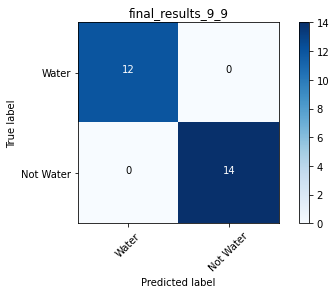

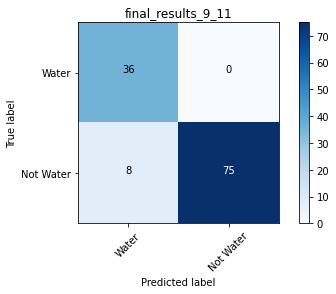

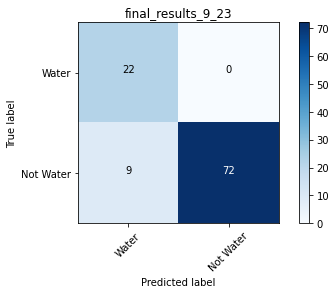

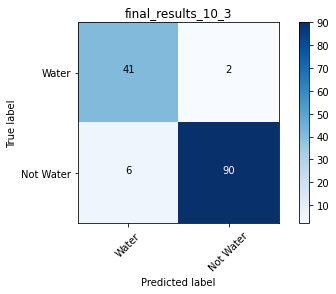

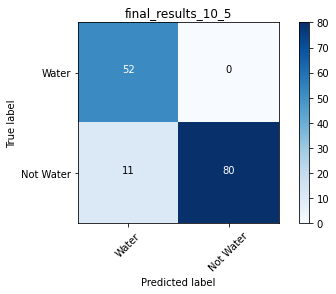

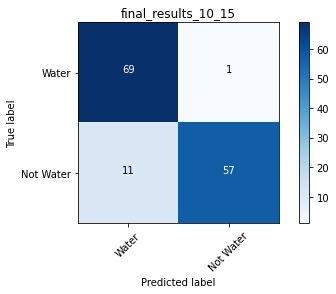

In [ ]:
#this code block produces 4 confusion matrices using plot_confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


##code should automatically save the plots as pngs or you can right click them and save as too.

#Plot 
plt.figure()
plot_confusion_matrix(final_results_9_9, classes=class_names,
                      title= 'final_results_9_9')

# fig.savefig('final_results_9_9')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_9_11, classes=class_names,
                      title='final_results_9_11')
# fig.savefig('final_results_9_11')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_9_23, classes=class_names,
                      title='final_results_9_23')
# fig.savefig('final_results_9_23')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_10_3, classes=class_names,
                      title='final_results_10_3')
# fig.savefig('final_results_10_3')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_10_5, classes=class_names,
                      title='final_results_10_5')
# fig.savefig('final_results_10_5')

# Plot 
plt.figure()
plot_confusion_matrix(final_results_10_15, classes=class_names,
                      title='final_results_10_15')
# fig.savefig('final_results_10_15')

plt.savefig("abc.png")
plt.show()